In [491]:
n=10
infection_rate = 0.2

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

In [639]:
x = np.linspace(0,20)

In [640]:
import matplotlib.pyplot as plt

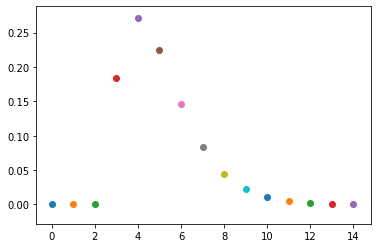

In [408]:
for i in x:
    plt.scatter(i, death_function(i))

In [939]:
infectivity_r = 0.2
lethality_r = 0.02

In [940]:
def infectivity(x):
    y= x*x*np.exp(-0.4*x)
    return x*x*np.exp(-0.4*x)*infectivity_r 

In [941]:
def lethality(x):
    y= x*x*np.exp(-0.6*x)
    return y*lethality_r

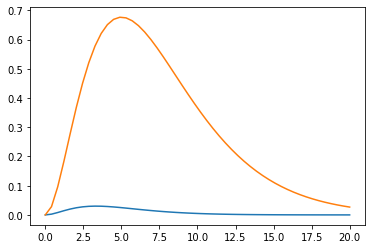

In [942]:
x = np.linspace(0,20)
plt.plot(x, lethality(x))
plt.plot(x, infectivity(x))

In [943]:
class dude:
    def __init__(self, sick = False, got_sick_on = 0, immune = False, status = 'alive', t=0):
        self.sick = sick
        self.got_sick_on = got_sick_on
        self.immune = immune
        self.status = status 
        self.t = t
        
    def infect(self):
        if not self.sick and not self.immune and self.status!='dead':
            #print('Infected on day:', self.t)
            self.sick = True
            self.got_sick_on = self.t
            return 1
        else:
            #print('Already infected,immune or dead')
            return 0
            
    def time_elapse(self):
        self.t = self.t+1
        #print('Day:', self.t, 'Status:', self.status)
        if self.sick:
            day_of_sickness = self.t - self.got_sick_on
            #print('Sick: day', day_of_sickness)
            if np.random.uniform() < lethality(day_of_sickness):
                #print('Died')
                self.status = 'dead'
                self.sick = False
                return 'dead'
            if day_of_sickness > 15:
                self.sick = False
                self.immune = True
                #print('Mah boy developed immunity.')
                return 'immune'
        
            
    def label(self):
        if self.status == 'dead':
            return 'dead'
        elif self.immune:
            return 'immune'
        elif self.sick:
            return 'infected'
        else:
            return 'healthy'
            
    def infect_coef(self):
        if self.sick:
            day_of_sickness = self.t - self.got_sick_on
            return infectivity(day_of_sickness)
        else: 
            return 0

In [944]:
#initial parameters
n = 500
n_infected = 10

In [945]:
infection_rate=0.45

In [946]:
new_infections=[]
new_deaths = []   

In [949]:
days = []
population = []
for i in range(n-n_infected):
    population.append(dude(sick = False, got_sick_on = 0, immune = False, status = 'alive', t=0))
for i in range(n_infected):
    population.append(dude(sick = True, got_sick_on = 0, immune = False, status = 'alive', t=0))

for t in range(500):
    day = []
    healthy = 0
    for p in population:
        l = p.label()
        day.append(l)
        if l == 'healthy':
            healthy+=1
        
        
        
    days.append(day)
    infected = 0
    collective_infectivity = 0
    for d in population:
        if d.sick:
            infected+=1
            collective_infectivity+=d.infect_coef()
        
    
    if infected == 0:
        break
    newly_infected =collective_infectivity*infection_rate*healthy/(n)
    
    if newly_infected < 1:
        if np.random.uniform() < newly_infected:
            newly_infected = 1
        else:
            newly_infected = 0
    
    newly_infected = int(newly_infected)
    new_infections.append(newly_infected)
        

    for i in range(newly_infected):
        for p in population:
            if p.infect():
                break
    deaths = 0            
    for p in population:
        if p.time_elapse() == 'dead':
            deaths+=1
    new_deaths.append(deaths)
    print('newly infected:', newly_infected, 'died:', deaths)

newly infected: 0 died: 0
newly infected: 0 died: 0
newly infected: 1 died: 0
newly infected: 2 died: 0
newly infected: 3 died: 0
newly infected: 3 died: 1
newly infected: 3 died: 0
newly infected: 4 died: 1
newly infected: 4 died: 0
newly infected: 5 died: 0
newly infected: 6 died: 0
newly infected: 6 died: 0
newly infected: 7 died: 1
newly infected: 8 died: 2
newly infected: 9 died: 0
newly infected: 10 died: 2
newly infected: 10 died: 2
newly infected: 11 died: 2
newly infected: 12 died: 0
newly infected: 13 died: 2
newly infected: 14 died: 1
newly infected: 15 died: 0
newly infected: 16 died: 4
newly infected: 16 died: 4
newly infected: 16 died: 4
newly infected: 16 died: 5
newly infected: 16 died: 2
newly infected: 16 died: 3
newly infected: 15 died: 1
newly infected: 15 died: 7
newly infected: 14 died: 1
newly infected: 13 died: 4
newly infected: 12 died: 1
newly infected: 12 died: 3
newly infected: 11 died: 2
newly infected: 10 died: 1
newly infected: 9 died: 1
newly infected: 8

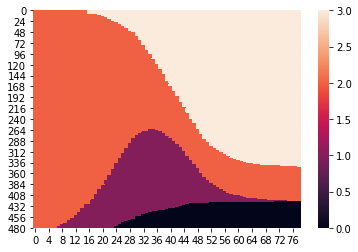

In [950]:
timeline = pd.DataFrame(days).replace({'dead':0, 'infected':1, 'healthy':2, 'immune':3}).transpose()
for t in timeline.columns:
    timeline[t] = list(timeline[t].sort_values(ascending = False))
    
sns.heatmap(np.array(timeline), vmin = 0, vmax = 3)

In [959]:
h_ = []
d_ = []
s_ = []
i_ = []
for d in days:
    h_.append(d.count('healthy'))
    d_.append(d.count('dead'))
    s_.append(d.count('infected'))
    i_.append(d.count('immune'))

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78])

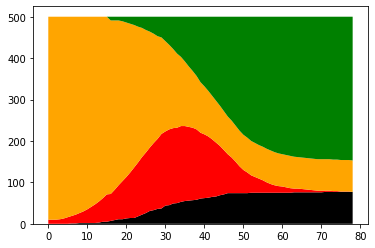

In [970]:
plt.stackplot(np.arange(len(h_)), d_, s_, h_, i_, colors=['black', 'red', 'orange', 'green'])

In [708]:
population[5].sick

True

In [709]:
population[5].t

14

In [728]:
population[6].sick

True

In [730]:
population[6].infect_coef()

0.3663127777746836

In [863]:
np.array(timeline)

array([[2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
       [2],
    